```
Model
*  neuralprophet *
1. pytorch based Gradient_Descent
2. AR-Net Auto_Correlation model
```

In [1]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# For prophet
## timeline => ds
## target => y 

airdf = pd.read_csv('../../99_raw_data/international-airline-passengers.txt')
airdf.columns = ['ds','y']
airdf

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [18]:
model = NeuralProphet()
result=model.fit(airdf)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 434
WARNING - (py.warnings._showwarnmsg) - /opt/homebrew/Caskroom/miniforge/base/envs/deep_learning/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1789: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_w

Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [19]:
result

,MAE,RMSE,Loss,RegLoss,epoch
0,264.927155,317.986450,0.247252,0.0,0
1,263.058044,317.099731,0.244269,0.0,1
2,261.032471,316.685913,0.240984,0.0,2
3,258.866272,311.205688,0.237705,0.0,3
4,256.679077,311.185364,0.234147,0.0,4
...,...,...,...,...,...
429,17.024336,21.944632,0.001226,0.0,429
430,17.023857,21.945923,0.001225,0.0,430
431,17.023390,21.978638,0.001225,0.0,431
432,17.023077,21.634087,0.001225,0.0,432


In [21]:
_pred=model.predict(airdf)
_pred.loc[:,['y','yhat1']].plot()

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


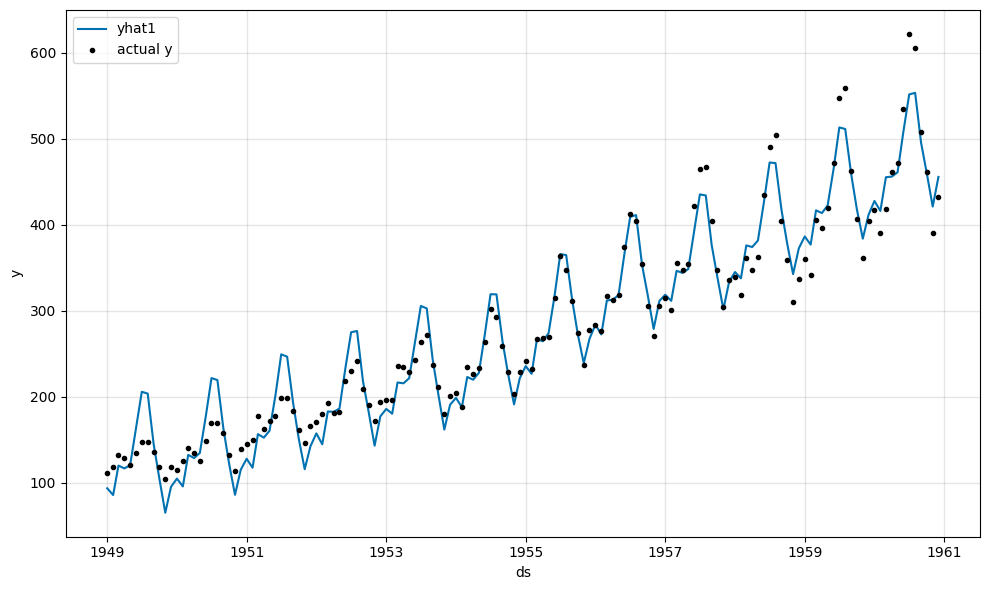

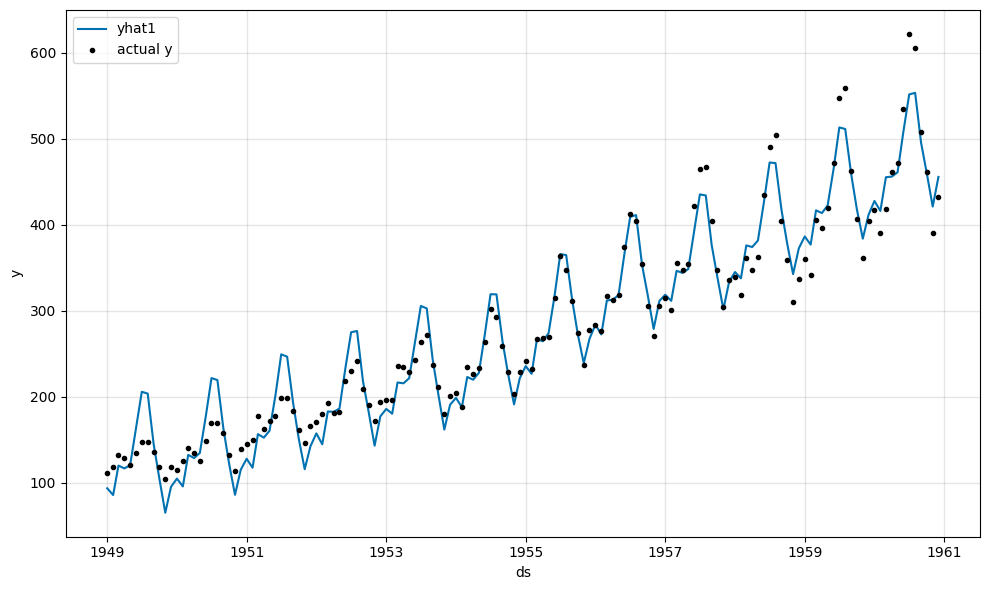

In [28]:
model.plot(_pred)

In [37]:
# 예측용 미래 df 만들기
# 
future=model.make_future_dataframe(airdf, periods=24)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [38]:
pred_future=model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


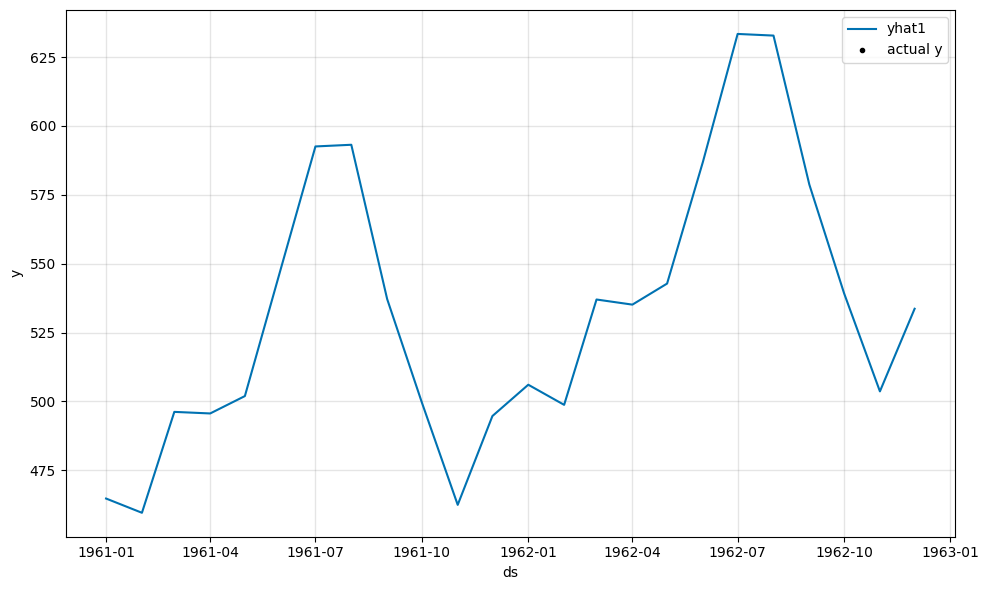

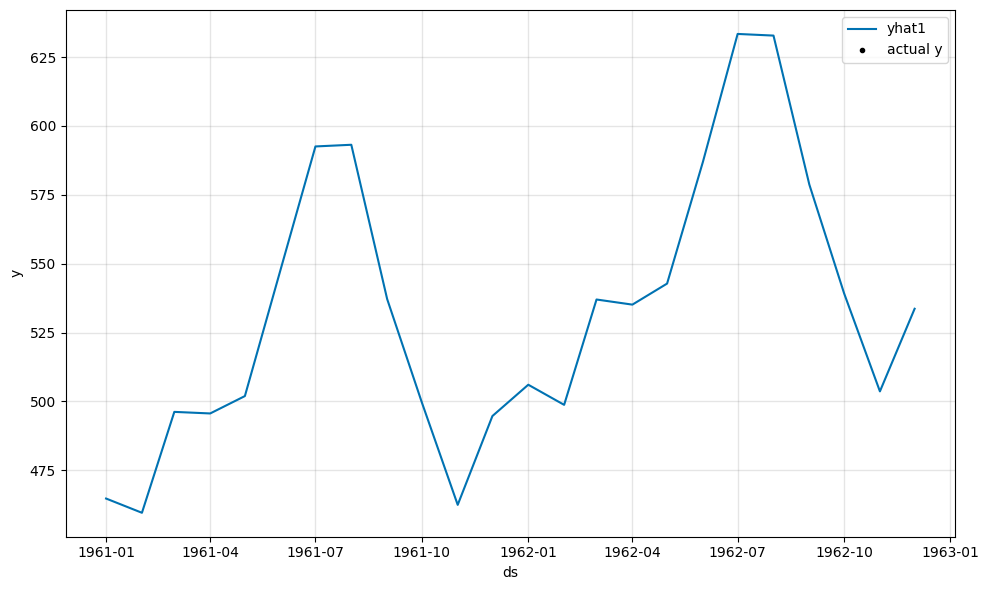

In [41]:
model.plot(pred_future)

In [39]:
pred_future

,ds,y,yhat1,trend,season_yearly
0,1961-01-01,None,464.772705,493.708588,-28.935869
1,1961-02-01,None,459.606049,497.122040,-37.516006
2,1961-03-01,None,496.221558,500.205139,-3.983605
3,1961-04-01,None,495.650848,503.618500,-7.967651
4,1961-05-01,None,501.958374,506.921844,-4.963442
5,1961-06-01,None,548.048767,510.335205,37.713585
6,1961-07-01,None,592.544922,513.638550,78.906410
7,1961-08-01,None,593.152588,517.051941,76.100693
8,1961-09-01,None,537.163818,520.465332,16.698452
9,1961-10-01,None,499.633026,523.768616,-24.135567


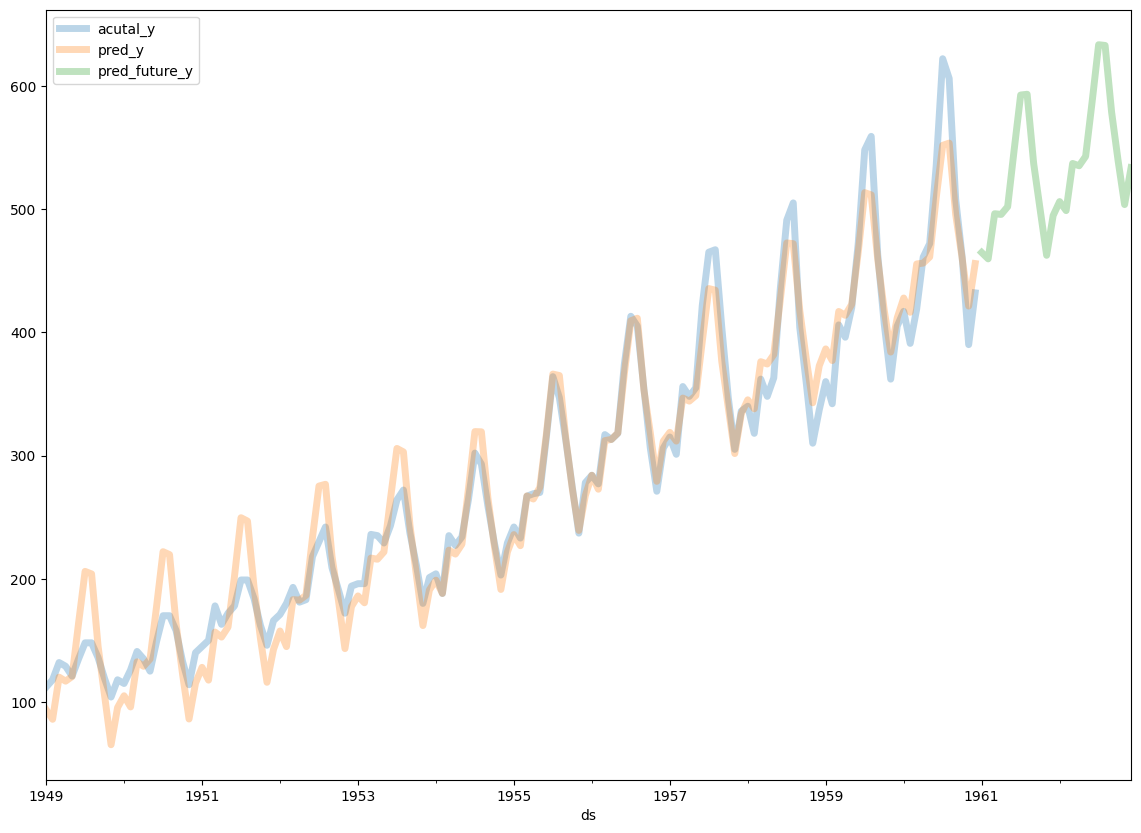

In [44]:
_pred.set_index('ds').loc[:,'y'].plot(figsize=(14,10),lw=5,alpha=0.3,label='acutal_y')
_pred.set_index('ds').loc[:,'yhat1'].plot(figsize=(14,10),lw=5,alpha=0.3,label='pred_y')
pred_future.set_index('ds').loc[:,'yhat1'].plot(figsize=(14,10),lw=5,alpha=0.3,label='pred_future_y')
plt.legend()
plt.show()

In [49]:
model.plot(pd.concat([_pred,pred_future]))

In [ ]:
model.plot()